## Number of demonstrations / performance dynamic

In [4]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pickle
import pandas as pd

from sim_util import run_torch_sim

In [5]:
PATH_TO_EXPERT = "policies/reacher_3l_fc_100demos.md"
policy_file = open(PATH_TO_EXPERT, "rb")
ext_policy = torch.load(policy_file)
ext_policy.eval()

Sequential(
  (0): Linear(in_features=11, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=2, bias=True)
)

In [6]:
pickle_in = open("expert_data/Reacher-v2_1000.pkl","rb")
reacher_expert = pickle.load(pickle_in)

observations = reacher_expert['observations']

actions = reacher_expert['actions']
actions = actions.reshape(-1, 2)
observations.shape, actions.shape

((50000, 11), (50000, 2))

In [7]:
def training_loop(loader_train, model, optimizer, epochs=1, print_every=1):
    criterion = nn.MSELoss()
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()
            scores = model(x)
            loss = criterion(scores, y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
#         if e % print_every == 0:
#             print('Epoch %d, loss = %.4f' % (e, loss.item()))
#     print('Epoch %d, loss = %.4f' % (e, loss.item()))
    
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

In [8]:
def train_model(observations, actions, epochs=45):
    num_train = len(observations)

    observations_tensor = torch.from_numpy(observations).float()
    actions_tensor = torch.from_numpy(actions).float()
    dataset = torch.utils.data.TensorDataset(observations_tensor, actions_tensor)
    loader_train = torch.utils.data.DataLoader(dataset, batch_size=128, 
                              sampler=torch.utils.data.sampler.SubsetRandomSampler(range(num_train)))

    model = nn.Sequential(
        nn.Linear(11, 30),
        nn.ReLU(),
        nn.Linear(30, 15),
        nn.ReLU(),
        nn.Linear(15, 2)
    )

    model.apply(init_weights)

    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    training_loop(loader_train, model, optimizer, epochs=epochs)
    return model

In [9]:
roll_out_len = 50
roll_out_steps = 10

mean_returns = list()
i = 0
while i < len(observations) // 2:
    i = i + roll_out_len * roll_out_steps
    obs_short = observations[:i]
    act_short = actions[:i]
    model = train_model(obs_short, act_short)
    _, returns = run_torch_sim(model, "Reacher-v2", num_rollouts=20)
    mean_returns.append(np.mean(returns))

/home/raznem/anaconda3/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


running build_ext
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.

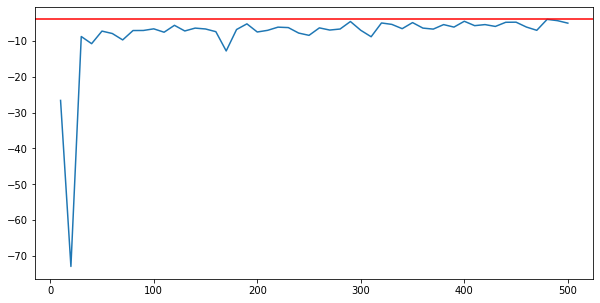

In [11]:
plt.figure(figsize=(10,5))
plt.plot(np.linspace(roll_out_steps, 500, 500 // roll_out_steps), mean_returns)
plt.axhline(-3.90752964581997, color='r')
plt.show()

In [12]:
_, returns = run_torch_sim(model, "Reacher-v2", num_rollouts=20, render=True)

/home/raznem/anaconda3/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Creating window glfw
